In [ ]:
import pickle
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open('Final_model/K6_D10_500subjs_compact_model.pkl', 'rb') as f:
    [model, q, elbos, q_z] = pickle.load(f)

In [3]:
pid = np.unique(model.tags)
num_subject = len(pid)
K = 6

In [4]:
max_eigval = np.zeros((K,num_subject))
for k in range(K):
    max_eigval[k, :] = [np.max(abs(np.linalg.eig(model.children[pid[s]].dynamics.As[k])[0])) for s in range(num_subject)] # norm of leading eigenvalues

In [8]:
state_order = [0, 4, 2, 1, 5, 3]

In [ ]:
# group-level maximum eigenvalue norm for each state
[np.max(abs(np.linalg.eig(model.parent.dynamics.As[state_order[k]])[0])) for k in range(K)]

[0.941269041153221,
 0.8989135979923784,
 0.930761400962275,
 0.8998542281698266,
 0.9611240995030901,
 0.7014567364272526]

In [12]:
T = np.zeros(K)
for k in range(K):
    child_params = max_eigval[state_order[k],:]
    T[k] = np.sqrt(num_subject)*(np.mean(child_params)-1)/np.std(child_params)

In [ ]:
# one-sided test
# test based on t-distribution, degrees of freedom = num_subject-1 
p_values = [scipy.stats.t.sf(np.abs(T[k]), df = num_subject-1) for k in range(K)]

In [16]:
[p_values[k] < (0.05/K) for k in range(K)]

[True, True, True, True, True, True]

Text(0.02, 0.5, 'number of subjects')

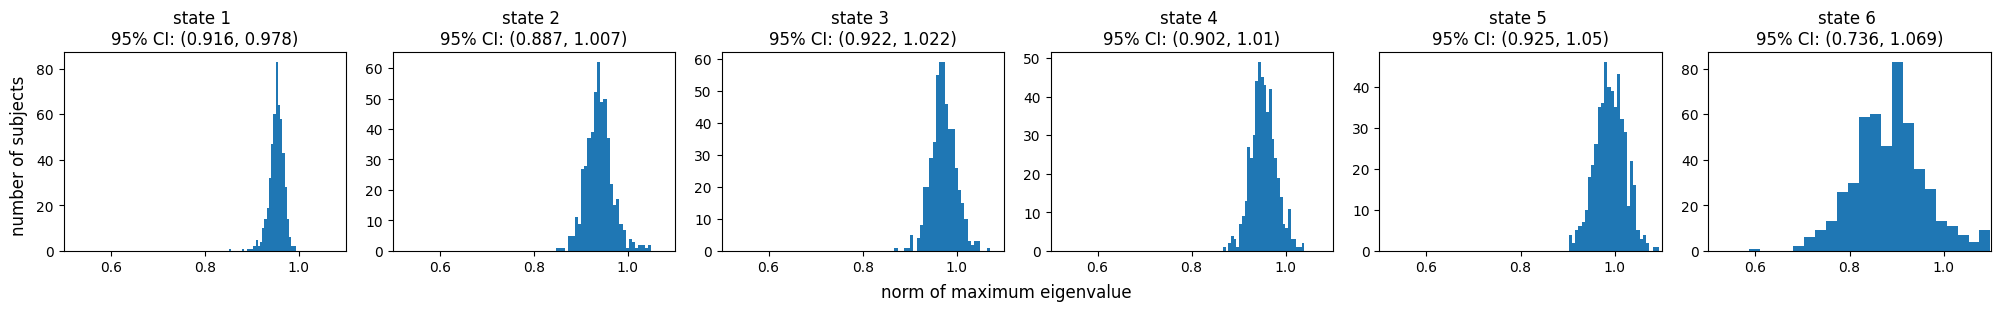

In [ ]:
# # distribution of max eigenvalue norm across subjects
# fig, axs = plt.subplots(ncols= K, nrows = 1, figsize = (20,3), layout = 'constrained')
# for k in range(K):
#     ax = axs[k]
#     x = max_eigval[state_order[k],:]
#     ax.hist(x, bins = 30)
#     ax.set_xlim(.5, 1.1)
#     ax.set_title(f"state {k+1} \n95% CI: {round(np.quantile(x, .025),3), round(np.quantile(x, .975),3)}")
# fig.supxlabel('norm of maximum eigenvalue')
# fig.supylabel('number of subjects')